<a href="https://colab.research.google.com/github/maxshowarth/MMAI894_ForestFireDetection/blob/Nafis/2classCNN_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

In [0]:
import numpy as np
import os
from sklearn.metrics import confusion_matrix
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle           
import matplotlib.pyplot as plt             
import cv2                                 

In [0]:
class_names = ['No-fire', 'fire']

class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

nb_classes = len(class_names) #nb_classes = 2

IMAGE_SIZE = (224, 224)

In [0]:
!unzip /content/img_2class.zip

Archive:  /content/img_2class.zip
   creating: img_2class/
   creating: img_2class/test/
   creating: img_2class/test/fire/
  inflating: img_2class/test/fire/LC80890812019310LGN00_Visual.tif-3978-3042-4212-3276.png  
  inflating: img_2class/test/fire/LC80890812019310LGN00_Visual.tif-3978-3276-4212-3510.png  
  inflating: img_2class/test/fire/LC80890812019310LGN00_Visual.tif-4212-1872-4446-2106.png  
  inflating: img_2class/test/fire/LC80890812019310LGN00_Visual.tif-468-1872-702-2106.png  
  inflating: img_2class/test/fire/LC80890812019310LGN00_Visual.tif-5850-1872-6084-2106.png  
  inflating: img_2class/test/fire/LC80890822019310LGN00_Visual.tif-3276-3042-3510-3276.png  
  inflating: img_2class/test/fire/LC80890822019310LGN00_Visual.tif-5148-2574-5382-2808.png  
  inflating: img_2class/test/fire/LC80890822019310LGN00_Visual.tif-5148-2808-5382-3042.png  
  inflating: img_2class/test/fire/LC80900832019317LGN00_Visual.tif-3042-4212-3276-4446.png  
  inflating: img_2class/test/fire/LC80900

In [0]:
def load_data():
    """
        Load the data:
           
    """
    
    datasets = ['img_2class/train', 'img_2class/test']
    output = []
    
    # Iterate through training and test sets
    for dataset in datasets:
        
        images = []
        labels = []
        
        print("Loading {}".format(dataset))
        
        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):
            curr_label = class_names_label[folder]
            
            # Iterate through each image in our folder
            for file in os.listdir(os.path.join(dataset, folder)):
                
                # Get the path name of the image
                img_path = os.path.join(os.path.join(dataset, folder), file)
                
                # Open and resize the img
                curr_img = cv2.imread(img_path)
                curr_img = cv2.resize(curr_img, IMAGE_SIZE) 
                
                # Append the image and its corresponding label to the output
                images.append(curr_img)
                labels.append(curr_label)
                
        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')   
        
        output.append((images, labels))

    return output

In [0]:
(train_images, train_labels), (test_images, test_labels) = load_data()

Loading img_2class/train
Loading img_2class/test


In [0]:
train_images, train_labels = shuffle(train_images, train_labels)

In [0]:
print ("Number of training examples: " + str(train_labels.shape[0]))
print ("Number of testing examples: " + str(test_labels.shape[0]))
print ("Each image is of size: " + str(train_images.shape[1:]))

Number of training examples: 213
Number of testing examples: 122
Each image is of size: (224, 224, 3)


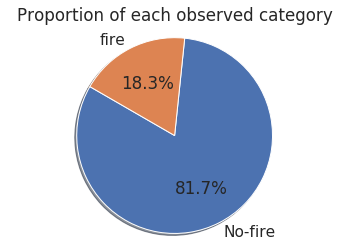

In [0]:
# Plot a pie chart
sizes = np.bincount(train_labels)
explode = (0, 0)  
plt.pie(sizes, explode=explode, labels=class_names,
autopct='%1.1f%%', shadow=True, startangle=150)
plt.axis('equal')
plt.title('Proportion of each observed category')

plt.show()

In [0]:
train_images = train_images / 255.0 
test_images = test_images / 255.0

In [0]:
def display_random_image(class_names, images, labels):
    """
        Display a random image from the images array and its correspond label from the labels array.
    """
    
    index = np.random.randint(images.shape[0])
    plt.figure()
    plt.imshow((images[index]*255).astype(np.uint8))
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title('Image #{} : '.format(index) + class_names[labels[index]])
    plt.show()

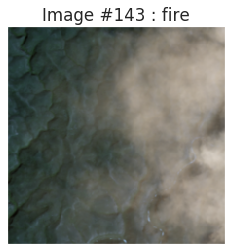

In [0]:
display_random_image(class_names, train_images, train_labels)


In [0]:
def display_examples(class_names, images, labels):
    """
        Display 25 images from the images array with its corresponding labels
    """
    
    fig = plt.figure(figsize=(10,10))
    fig.suptitle("Some examples of images of the dataset", fontsize=16)
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i]])
    plt.show()

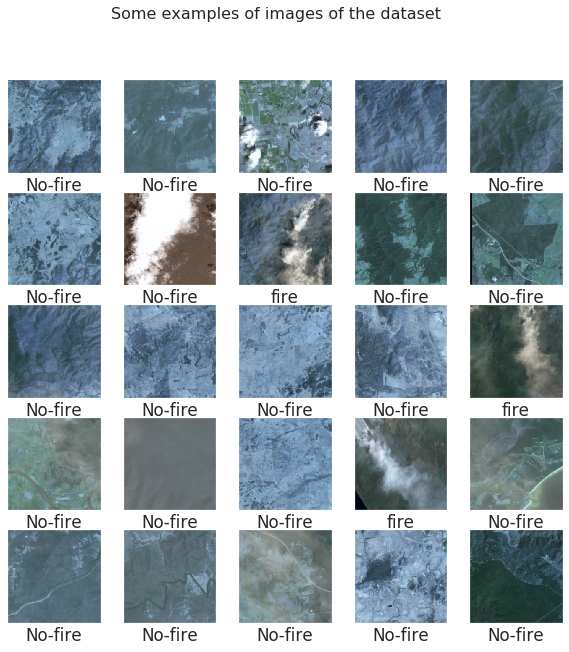

In [0]:
display_examples(class_names, train_images, train_labels)


## CNN- Watts


In [0]:
def watts_v0(image_size = IMAGE_SIZE ):
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(image_size[0], image_size[1], 3)))
  model.add(tf.keras.layers.MaxPooling2D((2, 2)))
  model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
  model.add(tf.keras.layers.MaxPooling2D((2, 2)))
  model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
  model.add(tf.keras.layers.MaxPooling2D((2, 2)))
  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(128, activation='relu'))
  model.add(tf.keras.layers.Dense(1, activation='softmax'))

  print(model.summary())
  return model

In [0]:
model_0  = watts_v0(IMAGE_SIZE)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 52, 52, 64)        36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 26, 26, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 43264)            

In [0]:
#model_0.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['accuracy'])

model_0.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [0]:
history = model_0.fit(train_images, train_labels, batch_size=128, epochs=10, validation_split = 0.2)

Train on 170 samples, validate on 43 samples
Epoch 1/10
170/170 [==============================] - 14s 80ms/sample - loss: 12.4685 - accuracy: 0.1824 - val_loss: 12.4122 - val_accuracy: 0.1860
Epoch 2/10
170/170 [==============================] - 13s 79ms/sample - loss: 12.4685 - accuracy: 0.1824 - val_loss: 12.4122 - val_accuracy: 0.1860
Epoch 3/10
170/170 [==============================] - 13s 79ms/sample - loss: 12.4685 - accuracy: 0.1824 - val_loss: 12.4122 - val_accuracy: 0.1860
Epoch 4/10
170/170 [==============================] - 13s 79ms/sample - loss: 12.4685 - accuracy: 0.1824 - val_loss: 12.4122 - val_accuracy: 0.1860
Epoch 5/10
170/170 [==============================] - 13s 79ms/sample - loss: 12.4685 - accuracy: 0.1824 - val_loss: 12.4122 - val_accuracy: 0.1860
Epoch 6/10
170/170 [==============================] - 13s 79ms/sample - loss: 12.4685 - accuracy: 0.1824 - val_loss: 12.4122 - val_accuracy: 0.1860
Epoch 7/10
170/170 [==============================] - 13s 79ms/samp

In [0]:
def plot_accuracy_loss(history):
    """
        Plot the accuracy and the loss during the training of the nn.
    """
    fig = plt.figure(figsize=(10,5))

    # Plot accuracy
    plt.subplot(221)
    plt.plot(history.history['accuracy'],'bo--', label = "acc")
    plt.plot(history.history['val_accuracy'], 'ro--', label = "val_acc")
    plt.title("train_acc vs val_acc")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()

    # Plot loss function
    plt.subplot(222)
    plt.plot(history.history['loss'],'bo--', label = "loss")
    plt.plot(history.history['val_loss'], 'ro--', label = "val_loss")
    plt.title("train_loss vs val_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")

    plt.legend()
    plt.show()

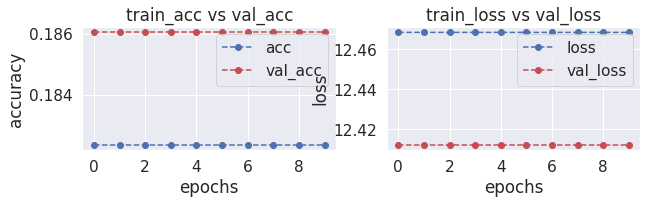

In [0]:
plot_accuracy_loss(history)

# Different way to import images - archive


In [0]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# import os
# import numpy as np
# import matplotlib.pyplot as plt

In [0]:
# train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
# validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data

In [0]:
# batch_size = 32
# epochs = 5
# IMG_HEIGHT = 224
# IMG_WIDTH = 224

In [0]:
# train_dir = os.path.join('/content/img_2class', 'train')
# train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
#                                                            directory=train_dir,
#                                                            shuffle=True,
#                                                            target_size=(IMG_HEIGHT, IMG_WIDTH),
#                                                            class_mode='binary')

Found 213 images belonging to 2 classes.


In [0]:
# validation_dir = os.path.join('/content/img_2class', 'test')

# val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
#                                                               directory=validation_dir,
#                                                               target_size=(IMG_HEIGHT, IMG_WIDTH),
#                                                               class_mode='binary')

Found 122 images belonging to 2 classes.


In [0]:
# sample_training_images, _ = next(train_data_gen)


In [0]:
# # This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
# def plotImages(images_arr):
#     fig, axes = plt.subplots(1, 5, figsize=(20,20))
#     axes = axes.flatten()
#     for img, ax in zip( images_arr, axes):
#         ax.imshow(img)
#         ax.axis('off')
#     plt.tight_layout()
#     plt.show()

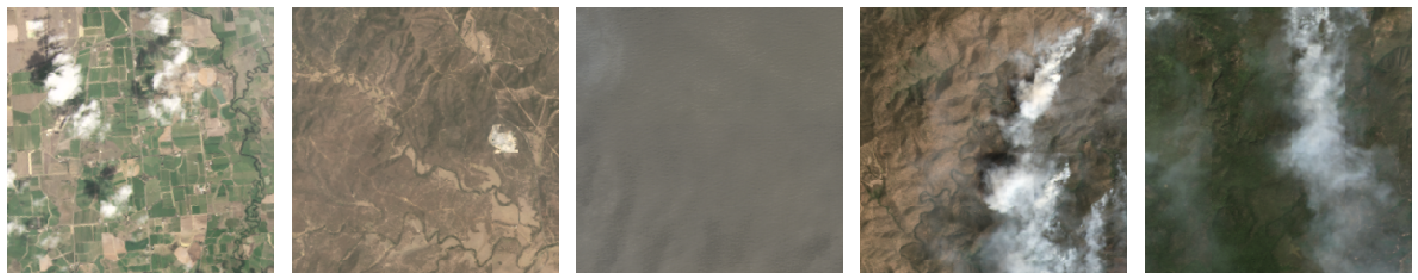

In [0]:
# plotImages(sample_training_images[:5])


In [0]:
# model_0  = watts_v0(IMAGE_SIZE)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 52, 52, 64)        36928     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 26, 26, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 43264)            

In [0]:
# model_0.compile(optimizer='adam',
#               loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
#               metrics=['accuracy'])

In [0]:
# total_train, total_val = 213, 122
# history = model_0.fit(
#     train_data_gen,
#     steps_per_epoch=total_train // batch_size,
#     epochs=epochs,
#     validation_data=val_data_gen,
#     validation_steps=total_val // batch_size
# )

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 6 steps, validate for 3 steps
Epoch 1/5
6/6 [==============================] - 17s 3s/step - loss: 1.1305 - accuracy: 0.1823 - val_loss: 1.1362 - val_accuracy: 0.1771
Epoch 2/5
6/6 [==============================] - 17s 3s/step - loss: 1.1516 - accuracy: 0.1602 - val_loss: 1.1362 - val_accuracy: 0.1771
Epoch 3/5
6/6 [==============================] - 17s 3s/step - loss: 1.1253 - accuracy: 0.1878 - val_loss: 1.1362 - val_accuracy: 0.1771
Epoch 4/5
6/6 [==============================] - 17s 3s/step - loss: 1.1148 - accuracy: 0.1989 - val_loss: 1.1362 - val_accuracy: 0.1771
Epoch 5/5
6/6 [==============================] - 18s 3s/step - loss: 1.1310 - accuracy: 0.1823 - val_loss: 1.1362 - val_accuracy: 0.1771


# AutoEncoder - archive


In [0]:
from tensorflow.keras.layers import Input,Conv2D,MaxPooling2D,UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop

In [0]:
inChannel = 3
input_img = Input(shape = (IMAGE_SIZE[0], IMAGE_SIZE[1], inChannel))

In [0]:
# def autoencoder_func(input_img):
#     #encoder
#     conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img) #28 x 28 x 32
#     pool1 = MaxPooling2D(pool_size=(2, 2))(conv1) #14 x 14 x 32
#     conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1) #14 x 14 x 64
#     pool2 = MaxPooling2D(pool_size=(2, 2))(conv2) #7 x 7 x 64
#     conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2) #7 x 7 x 128 (small and thick)
#     pool3 = MaxPooling2D(pool_size=(2, 2))(conv3) #7 x 7 x 64
#     conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(pool3) #7 x 7 x 128 (small and thick)

#     #decoder
#     conv5 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv4) #7 x 7 x 128
#     up1 = UpSampling2D((2,2))(conv5) # 14 x 14 x 128
#     conv6 = Conv2D(128, (3, 3), activation='relu', padding='same')(up1) #7 x 7 x 128
#     up2 = UpSampling2D((2,2))(conv6) # 14 x 14 x 128    
#     conv7 = Conv2D(64, (3, 3), activation='relu', padding='same')(up2) # 14 x 14 x 64
#     up3 = UpSampling2D((2,2))(conv7) # 28 x 28 x 64
#     decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(up3) # 28 x 28 x 1

#     return decoded

# autoencoder = Model(input_img, autoencoder_func(input_img))
# autoencoder.compile(loss='mean_squared_error', optimizer = RMSprop())

# autoencoder.summary()

In [0]:
# from sklearn.model_selection import train_test_split
# train_X,valid_X,train_ground,valid_ground = train_test_split(train_images,
#                                                              train_images, 
#                                                              test_size=0.2, 
#                                                              random_state=42)

In [0]:
# batch_size = 32
# epochs = 3
# autoencoder_train = autoencoder.fit(train_X, train_ground, batch_size=batch_size,epochs=epochs,
#                                     verbose=1,validation_data=(valid_X, valid_ground))

Train on 764 samples, validate on 191 samples
Epoch 1/3
764/764 [==============================] - 496s 649ms/sample - loss: 0.0540 - val_loss: 0.0428
Epoch 2/3
764/764 [==============================] - 491s 642ms/sample - loss: 0.0424 - val_loss: 0.0420
Epoch 3/3
764/764 [==============================] - 494s 647ms/sample - loss: 0.0422 - val_loss: 0.0400


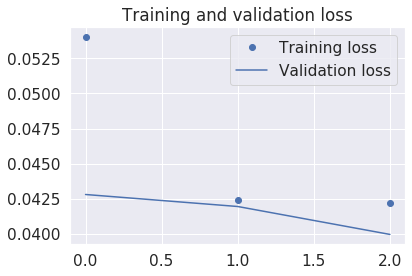

In [0]:
# loss = autoencoder_train.history['loss']
# val_loss = autoencoder_train.history['val_loss']
# epochs = range(epochs)
# plt.figure()
# plt.plot(epochs, loss, 'bo', label='Training loss')
# plt.plot(epochs, val_loss, 'b', label='Validation loss')
# plt.title('Training and validation loss')
# plt.legend()
# plt.show()

In [0]:
# pred = autoencoder.predict(test_images)

In [0]:
# plt.figure(figsize=(20, 4))
# print("Test Images")
# for i in range(10,20,1):
#     plt.subplot(2, 10, i+1)
#     plt.imshow(test_images[i, ..., 0], cmap='gray')
#     curr_lbl = test_labels[i]
#     plt.title("(Label: " + str(curr_lbl) + ")")
# plt.show()    
    

# plt.figure(figsize=(20, 4))
# print("Reconstruction of Noisy Test Images")
# for i in range(10,20,1):
#     plt.subplot(2, 10, i+1)
#     plt.imshow(pred[i, ..., 0], cmap='gray')  
# plt.show()

In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (IMAGE_SIZE[0], IMAGE_SIZE[1], 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(1, activation=tf.nn.softmax)
])

In [0]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [0]:
history = model.fit(train_images, train_labels, batch_size=128, epochs=20, validation_split = 0.2)

Train on 248 samples, validate on 63 samples
Epoch 1/20
248/248 [==============================] - 16s 66ms/sample - loss: 6.8253 - accuracy: 0.5524 - val_loss: 6.2933 - val_accuracy: 0.5873
Epoch 2/20
248/248 [==============================] - 14s 55ms/sample - loss: 6.8253 - accuracy: 0.5524 - val_loss: 6.2933 - val_accuracy: 0.5873
Epoch 3/20
248/248 [==============================] - 14s 55ms/sample - loss: 6.8253 - accuracy: 0.5524 - val_loss: 6.2933 - val_accuracy: 0.5873
Epoch 4/20
248/248 [==============================] - 14s 55ms/sample - loss: 6.8253 - accuracy: 0.5524 - val_loss: 6.2933 - val_accuracy: 0.5873
Epoch 5/20
248/248 [==============================] - 14s 55ms/sample - loss: 6.8253 - accuracy: 0.5524 - val_loss: 6.2933 - val_accuracy: 0.5873
Epoch 6/20
248/248 [==============================] - 14s 55ms/sample - loss: 6.8253 - accuracy: 0.5524 - val_loss: 6.2933 - val_accuracy: 0.5873
Epoch 7/20
248/248 [==============================] - 14s 55ms/sample - loss: 6

In [0]:
def plot_accuracy_loss(history):
    """
        Plot the accuracy and the loss during the training of the nn.
    """
    fig = plt.figure(figsize=(10,5))

    # Plot accuracy
    plt.subplot(221)
    plt.plot(history.history['accuracy'],'bo--', label = "acc")
    plt.plot(history.history['val_accuracy'], 'ro--', label = "val_acc")
    plt.title("train_acc vs val_acc")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()

    # Plot loss function
    plt.subplot(222)
    plt.plot(history.history['loss'],'bo--', label = "loss")
    plt.plot(history.history['val_loss'], 'ro--', label = "val_loss")
    plt.title("train_loss vs val_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")

    plt.legend()
    plt.show()

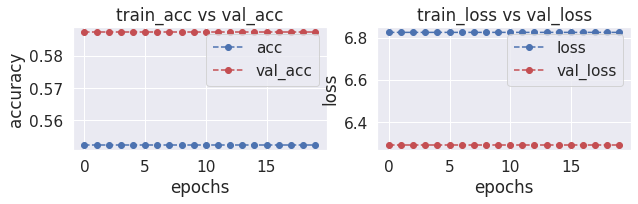

In [0]:
plot_accuracy_loss(history)

In [0]:
test_loss = model.evaluate(test_images, test_labels)

122/122 [==============================] - 2s 16ms/sample - loss: 2.3749 - accuracy: 0.8443


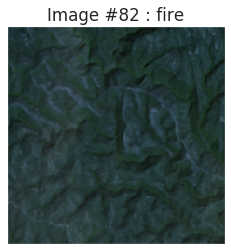

In [0]:
predictions = model.predict(test_images)     # Vector of probabilities
pred_labels = np.argmax(predictions, axis = 1) # We take the highest probability

display_random_image(class_names, test_images, pred_labels)

In [0]:
def print_mislabeled_images(class_names, test_images, test_labels, pred_labels):
    """
        Print 25 examples of mislabeled images by the classifier, e.g when test_labels != pred_labels
    """
    BOO = (test_labels == pred_labels)
    mislabeled_indices = np.where(BOO == 0)
    mislabeled_images = test_images[mislabeled_indices]
    mislabeled_labels = pred_labels[mislabeled_indices]

    title = "Some examples of mislabeled images by the classifier:"
    display_examples(class_names,  mislabeled_images, mislabeled_labels)


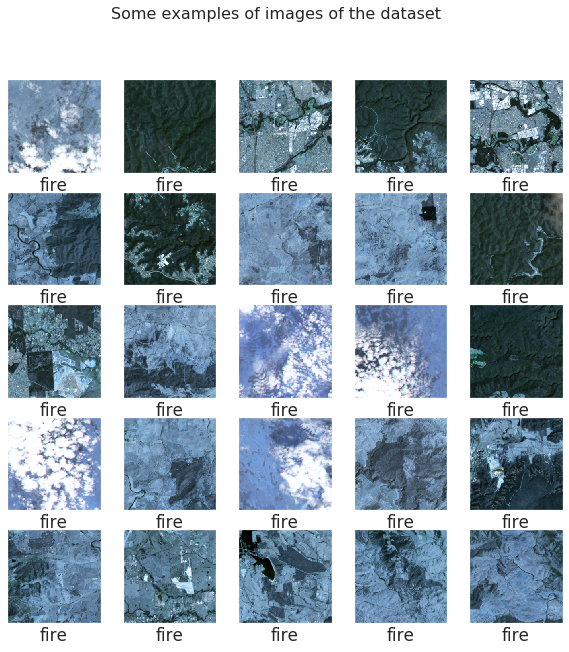

In [0]:
print_mislabeled_images(class_names, test_images, test_labels, pred_labels)


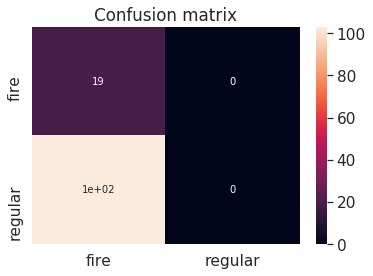

In [0]:
CM = confusion_matrix(test_labels, pred_labels)
ax = plt.axes()
sn.heatmap(CM, annot=True, 
           annot_kws={"size": 10}, 
           xticklabels=class_names, 
           yticklabels=class_names, ax = ax)
ax.set_title('Confusion matrix')
plt.show()

# Tansfer Learning

In [0]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input

model = VGG16(weights='imagenet', include_top=False)

58892288/58889256 [==============================] - 2s 0us/step


In [0]:
train_features = model.predict(train_images)
test_features = model.predict(test_images)

In [0]:
n_train, x, y, z = train_features.shape
n_test, x, y, z = test_features.shape
numFeatures = x * y * z

In [0]:
from sklearn import decomposition

pca = decomposition.PCA(n_components = 2)

X = train_features.reshape((n_train, x*y*z))
pca.fit(X)

C = pca.transform(X)
C1 = C[:,0]
C2 = C[:,1]

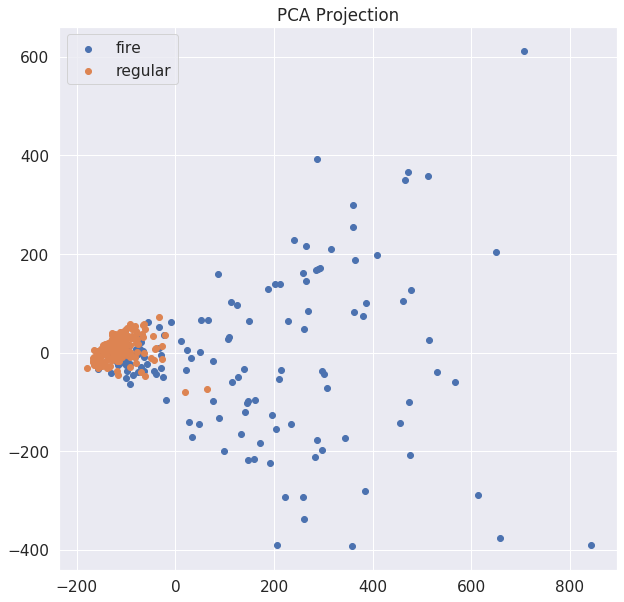

In [0]:

plt.subplots(figsize=(10,10))

for i, class_name in enumerate(class_names):
    plt.scatter(C1[train_labels == i][:1000], C2[train_labels == i][:1000], label = class_name)
plt.legend()
plt.title("PCA Projection")
plt.show()

In [0]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (x, y, z)),
    tf.keras.layers.Dense(50, activation=tf.nn.relu),
    tf.keras.layers.Dense(1, activation=tf.nn.softmax)
])

model2.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['accuracy'])

history2 = model2.fit(train_features, train_labels, batch_size=128, epochs=15, validation_split = 0.2)

Train on 248 samples, validate on 63 samples
Epoch 1/15
248/248 [==============================] - 0s 2ms/sample - loss: 6.7638 - accuracy: 0.5565 - val_loss: 6.5354 - val_accuracy: 0.5714
Epoch 2/15
248/248 [==============================] - 0s 293us/sample - loss: 6.7638 - accuracy: 0.5565 - val_loss: 6.5354 - val_accuracy: 0.5714
Epoch 3/15
248/248 [==============================] - 0s 293us/sample - loss: 6.7638 - accuracy: 0.5565 - val_loss: 6.5354 - val_accuracy: 0.5714
Epoch 4/15
248/248 [==============================] - 0s 275us/sample - loss: 6.7638 - accuracy: 0.5565 - val_loss: 6.5354 - val_accuracy: 0.5714
Epoch 5/15
248/248 [==============================] - 0s 295us/sample - loss: 6.7638 - accuracy: 0.5565 - val_loss: 6.5354 - val_accuracy: 0.5714
Epoch 6/15
248/248 [==============================] - 0s 339us/sample - loss: 6.7638 - accuracy: 0.5565 - val_loss: 6.5354 - val_accuracy: 0.5714
Epoch 7/15
248/248 [==============================] - 0s 326us/sample - loss: 6.7

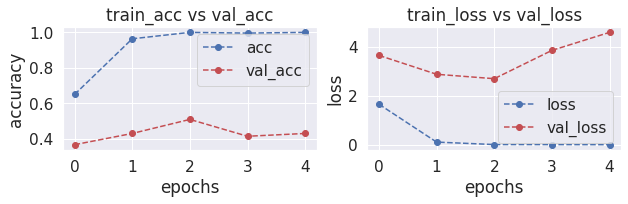

In [0]:
plot_accuracy_loss(history)

In [0]:
test_loss = model2.evaluate(test_features, test_labels)

122/122 [==============================] - 0s 175us/sample - loss: 2.3749 - accuracy: 0.8443


# Fine tune VGG 16

In [0]:
from tensorflow.keras.models import Model

model = VGG16(weights='imagenet', include_top=False)
model = Model(inputs=model.inputs, outputs=model.layers[-5].output)

In [0]:
train_features = model.predict(train_images)
test_features = model.predict(test_images)

In [0]:
from tensorflow.keras.layers import Input, Dense, Conv2D, Activation , MaxPooling2D, Flatten

model2 = VGG16(weights='imagenet', include_top=False)

input_shape = model2.layers[-4].get_input_shape_at(0) # get the input shape of desired layer
layer_input = Input(shape = (14, 14, 512)) # a new input tensor to be able to feed the desired layer
# https://stackoverflow.com/questions/52800025/keras-give-input-to-intermediate-layer-and-get-final-output

x = layer_input
for layer in model2.layers[-4::1]:
    x = layer(x)
    
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Flatten()(x)
x = Dense(100,activation='relu')(x)
x = Dense(1,activation='softmax')(x)

# create the model
new_model = Model(layer_input, x)

In [0]:
new_model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [0]:
new_model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 14, 14, 512)]     0         
_________________________________________________________________
block5_conv1 (Conv2D)        multiple                  2359808   
_________________________________________________________________
block5_conv2 (Conv2D)        multiple                  2359808   
_________________________________________________________________
block5_conv3 (Conv2D)        multiple                  2359808   
_________________________________________________________________
block5_pool (MaxPooling2D)   multiple                  0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 5, 5, 64)          294976    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 2, 2, 64)          0   

In [0]:
history = new_model.fit(train_features, train_labels, batch_size=32, epochs=10, validation_split = 0.2)

Train on 248 samples, validate on 63 samples
Epoch 1/10
248/248 [==============================] - 40s 162ms/sample - loss: 6.7638 - accuracy: 0.5565 - val_loss: 6.5354 - val_accuracy: 0.5714
Epoch 2/10
248/248 [==============================] - 40s 161ms/sample - loss: 6.7638 - accuracy: 0.5565 - val_loss: 6.5354 - val_accuracy: 0.5714
Epoch 3/10
248/248 [==============================] - 41s 164ms/sample - loss: 6.7638 - accuracy: 0.5565 - val_loss: 6.5354 - val_accuracy: 0.5714
Epoch 4/10
248/248 [==============================] - 40s 162ms/sample - loss: 6.7638 - accuracy: 0.5565 - val_loss: 6.5354 - val_accuracy: 0.5714
Epoch 5/10
248/248 [==============================] - 40s 161ms/sample - loss: 6.7638 - accuracy: 0.5565 - val_loss: 6.5354 - val_accuracy: 0.5714
Epoch 6/10
248/248 [==============================] - 40s 162ms/sample - loss: 6.7638 - accuracy: 0.5565 - val_loss: 6.5354 - val_accuracy: 0.5714
Epoch 7/10
248/248 [==============================] - 41s 164ms/sample - 

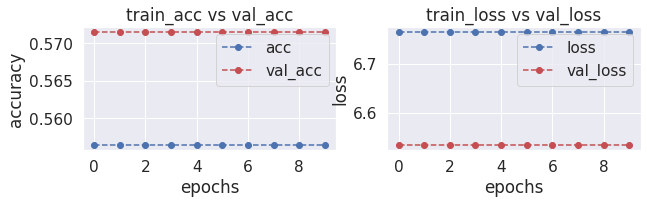

In [0]:
plot_accuracy_loss(history)

In [0]:
from sklearn.metrics import accuracy_score

predictions = new_model.predict(test_features)    
pred_labels = np.argmax(predictions, axis = 1)
print("Accuracy : {}".format(accuracy_score(test_labels, pred_labels)))

Accuracy : 0.1557377049180328


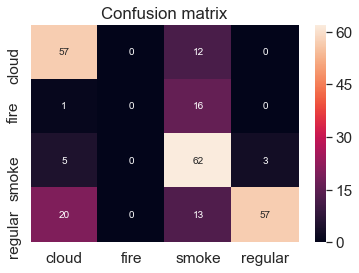

In [0]:
CM = confusion_matrix(test_labels, pred_labels)
ax = plt.axes()
sn.heatmap(CM, annot=True, 
           annot_kws={"size": 10}, 
           xticklabels=class_names, 
           yticklabels=class_names, ax = ax)
ax.set_title('Confusion matrix')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

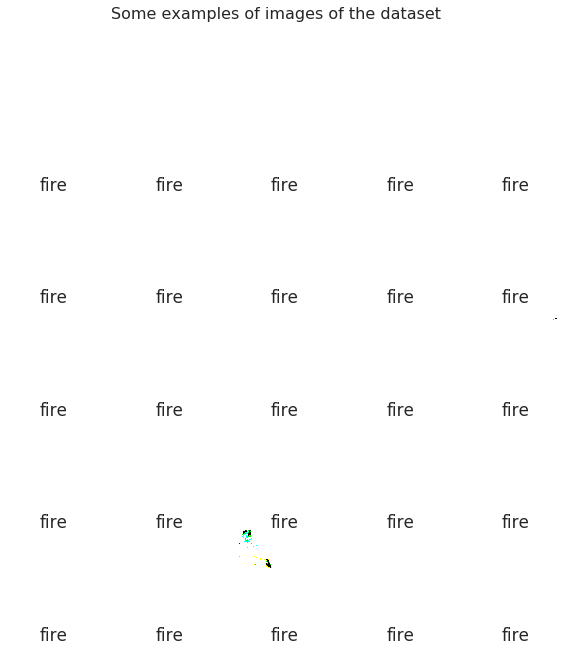

In [0]:
print_mislabeled_images(class_names, test_images, test_labels, pred_labels)


## EfficientNet


In [0]:
# !pip install -U git+https://github.com/qubvel/efficientnet


In [0]:
#import efficientnet.keras as efn 
from tensorflow.keras.models import Model
from tensorflow.keras.applications import NASNetMobile
def get_model():
    base_model =  NASNetMobile(weights='imagenet', include_top=False, pooling='max', input_shape=(224,224,3))
    x = base_model.output
    y_pred = tf.keras.layers.Dense(1, activation='sigmoid')(x)
    return Model(inputs=base_model.input, outputs=y_pred)

model = get_model()

In [0]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [0]:
#model.summary()

In [0]:
history = model.fit(train_images, train_labels, batch_size=128, epochs=5, validation_split = 0.2)

Train on 248 samples, validate on 63 samples
Epoch 1/5
248/248 [==============================] - 122s 491ms/sample - loss: 1.6543 - accuracy: 0.6492 - val_loss: 3.6487 - val_accuracy: 0.3651
Epoch 2/5
248/248 [==============================] - 94s 377ms/sample - loss: 0.1072 - accuracy: 0.9637 - val_loss: 2.8774 - val_accuracy: 0.4286
Epoch 3/5
248/248 [==============================] - 94s 377ms/sample - loss: 0.0067 - accuracy: 1.0000 - val_loss: 2.6973 - val_accuracy: 0.5079
Epoch 4/5
248/248 [==============================] - 94s 378ms/sample - loss: 0.0051 - accuracy: 0.9960 - val_loss: 3.8533 - val_accuracy: 0.4127
Epoch 5/5
248/248 [==============================] - 93s 377ms/sample - loss: 0.0013 - accuracy: 1.0000 - val_loss: 4.5896 - val_accuracy: 0.4286
